**Описание проекта**

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных**

Набор данных находится в файле /datasets/insurance.csv.
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.


**Оглавление**
1. [Загрузка данных](#step_1)
2. [Умножение матриц](#step_2)
3. [Алгоритм преобразования](#step_3)
4. [Проверка алгоритма](#step_4)
5. [Чек-лист проверки](#step_5)

## Загрузка данных
<a id="step_1"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('/datasets/insurance.csv')

In [3]:
insurance.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
insurance.columns = ['sex', 'age', 'salary', 'family_members', 'insurance_payments']

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
sex                   5000 non-null int64
age                   5000 non-null float64
salary                5000 non-null float64
family_members        5000 non-null int64
insurance_payments    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
insurance['age'] = insurance['age'].astype('int')
insurance['salary'] = insurance['salary'].astype('int')

In [7]:
insurance.shape

(5000, 5)

In [8]:
insurance.describe()

,sex,age,salary,family_members,insurance_payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


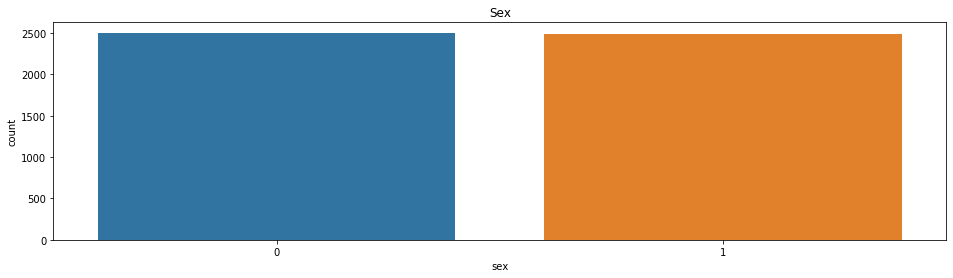

In [9]:
fig = plt.figure(figsize=(16, 4))
sns.countplot(x=insurance['sex'])
plt.title('Sex')
plt.show()

In [10]:
insurance['sex'].value_counts()

0    2505
1    2495
Name: sex, dtype: int64

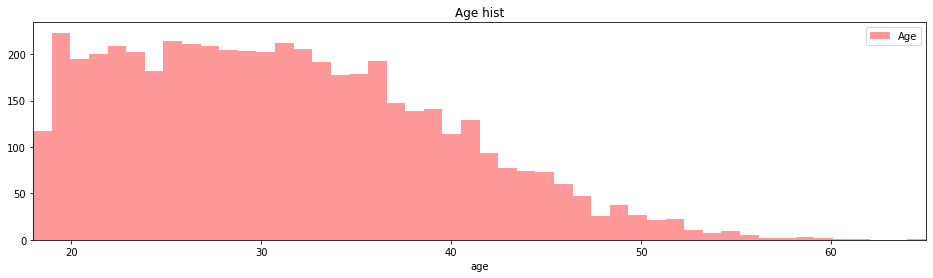

In [11]:
fig = plt.figure(figsize=(16, 4))
sns.distplot(insurance['age'], label='Age', kde=False, color='r', bins=(65-18+1))
plt.title('Age hist')
plt.legend()
plt.xlim(18,65)
plt.show()

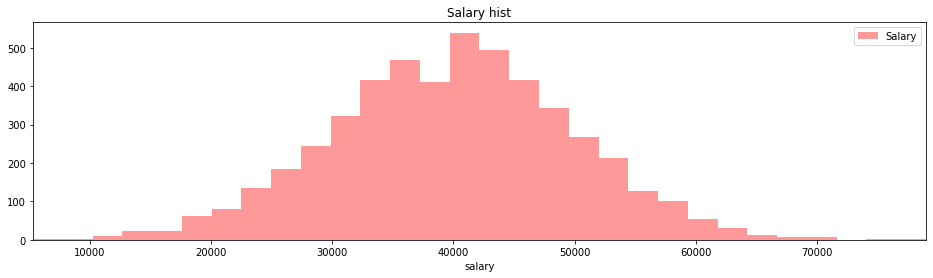

In [12]:
fig = plt.figure(figsize=(16, 4))
sns.distplot(insurance['salary'], label='Salary', kde=False, color='r', bins=30)
plt.title('Salary hist')
plt.legend()
plt.xlim(5300,79000)
plt.show()

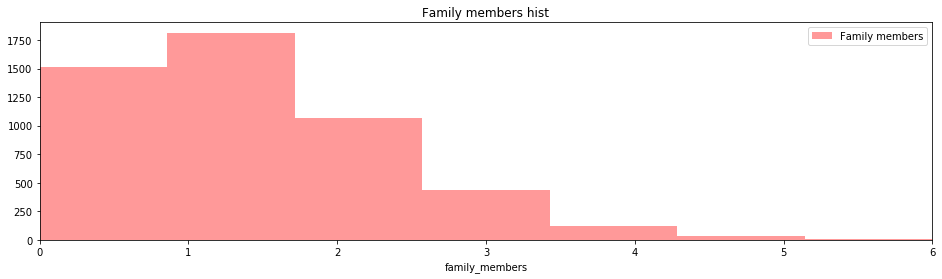

In [13]:
fig = plt.figure(figsize=(16, 4))
sns.distplot(insurance['family_members'], label='Family members', kde=False, color='r', bins=7)
plt.title('Family members hist')
plt.legend()
plt.xlim(0,6)
plt.show()

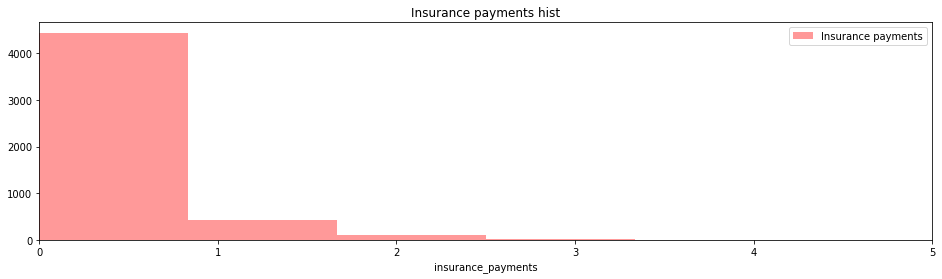

In [14]:
fig = plt.figure(figsize=(16, 4))
sns.distplot(insurance['insurance_payments'], label='Insurance payments', kde=False, color='r', bins=6)
plt.title('Insurance payments hist')
plt.legend()
plt.xlim(0,5)
plt.show()

**Вывод**

Загрузили данные о 5000 клиентах. Нет пропусков. 50/50 по половому признаку, по возрасту клиента от 18 до 65 лет, с доходом от 5 т.р. до 79 т.р., имеющих до 6 членов, получивших до 5 страховых выплат.

Так же мы переименовали наименования столбцов и 2 столбца привели к целочисленному типу.

## Умножение матриц
<a id="step_2"></a>

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответьте на вопрос и обоснуйте решение.**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- a. Изменится. Приведите примеры матриц.
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Нам понадобятся формулы:
- $(AB)^T = B^T A^T$
- $(AB)^{-1} = B^{-1} A^{-1}$

Подставим в формулу предсказаний ($a$) формулу обучения ($w$) и заменим матрицу признаков ($X$) на матрицу признаков умноженную на обратимую матрицу ($XP$):

$$
a_1 = XPw = X P ((X P)^T X P)^{-1} (X P)^T y = X P (P^T X^T X P)^{-1} P^T X^T y = X P (X^T X P)^{-1} (P^T)^{-1} P^T X^T y = 
$$

$$
= X P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = X E (X^T X)^{-1} E X^T y = X (X^T X)^{-1} X^T y = X w
$$

**Ответ:** Качество предсказаний линейной регрессии не изменится.

**Обоснование:** из доказательства выше мы получили $a_1 = a$

## Алгоритм преобразования
<a id="step_3"></a>

**Алгоритм**

- Сгенерировать квадратную матрицу P размерностью 4x4
- Проверить матрицу P на обратимость
- Умножить матрицу признаков X (тренировочную и валидационную) на матрицу P

**Обоснование**

При умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится, обосновано в пункте 2.

## Проверка алгоритма
<a id="step_4"></a>

In [16]:
X = insurance.drop('insurance_payments', axis = 1).values
Y = insurance['insurance_payments'].values

In [17]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, test_size=0.25, random_state=12345)

In [18]:
np.random.seed(12345)
P = np.random.normal(size=(4,4))
P

array([[-0.20470766,  0.47894334, -0.51943872, -0.5557303 ],
       [ 1.96578057,  1.39340583,  0.09290788,  0.28174615],
       [ 0.76902257,  1.24643474,  1.00718936, -1.29622111],
       [ 0.27499163,  0.22891288,  1.35291684,  0.88642934]])

In [19]:
np.linalg.inv(P)

array([[-1.31136747,  0.3921804 ,  0.18868055, -0.67088287],
       [ 1.75872714,  0.14106138, -0.17773045,  0.79787127],
       [-0.41702659, -0.22854768,  0.3550602 ,  0.33039819],
       [ 0.58912996,  0.19073027, -0.5545481 ,  0.6259302 ]])

In [20]:
XP_train = X_train.dot(P)
XP_valid = X_valid.dot(P)

In [21]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_predictions = model.predict(X_valid)
r2 = r2_score(Y_valid, Y_predictions)

print('LinearRegression X')
print(f'R2 score = {r2}')

LinearRegression X
R2 score = 0.4352275684083349


In [22]:
model = LinearRegression()
model.fit(XP_train, Y_train)
YP_predictions = model.predict(XP_valid)
r2_P = r2_score(Y_valid, YP_predictions)

print('LinearRegression XP')
print(f'R2 score = {r2_P}')

LinearRegression XP
R2 score = 0.4352275684080853


**Вывод**

Использую алгоритм преобразования описанный в пункте 3 и обоснованный в пункте 2 - мы проверили результаты линейной регрессии. Метрика качества R2 не ухудшилась.

Таким образом данные пользователей можно защитить не потеряв качества модели машинного обучения.